<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
df=pd.DataFrame(np.c_[data.data,data.target],columns=[list(data.feature_names)+['target']])
df.head()
df.shape
# Print the column names to check for the correct column name
print(df.columns)


MultiIndex([(            'mean radius',),
            (           'mean texture',),
            (         'mean perimeter',),
            (              'mean area',),
            (        'mean smoothness',),
            (       'mean compactness',),
            (         'mean concavity',),
            (    'mean concave points',),
            (          'mean symmetry',),
            ( 'mean fractal dimension',),
            (           'radius error',),
            (          'texture error',),
            (        'perimeter error',),
            (             'area error',),
            (       'smoothness error',),
            (      'compactness error',),
            (        'concavity error',),
            (   'concave points error',),
            (         'symmetry error',),
            ('fractal dimension error',),
            (           'worst radius',),
            (          'worst texture',),
            (        'worst perimeter',),
            (             'worst a

In [ ]:
# Strip any spaces from column names

# Check the column names to verify
print("Columns in the dataset:", df.columns)

# Drop the 'id' column if it exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Continue with splitting features (X) and target (y)
X = data.data # Features
y = data.target  # Target


Columns in the dataset: MultiIndex([(            'mean radius',),
            (           'mean texture',),
            (         'mean perimeter',),
            (              'mean area',),
            (        'mean smoothness',),
            (       'mean compactness',),
            (         'mean concavity',),
            (    'mean concave points',),
            (          'mean symmetry',),
            ( 'mean fractal dimension',),
            (           'radius error',),
            (          'texture error',),
            (        'perimeter error',),
            (             'area error',),
            (       'smoothness error',),
            (      'compactness error',),
            (        'concavity error',),
            (   'concave points error',),
            (         'symmetry error',),
            ('fractal dimension error',),
            (           'worst radius',),
            (          'worst texture',),
            (        'worst perimeter',),
          

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Scale the features (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Step 5: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=60, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Step 6: Evaluate both classifiers

# Decision Tree metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Random Forest metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}\n")

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}\n")



Decision Tree Classifier Metrics:
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1 Score: 0.9577

Random Forest Classifier Metrics:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722



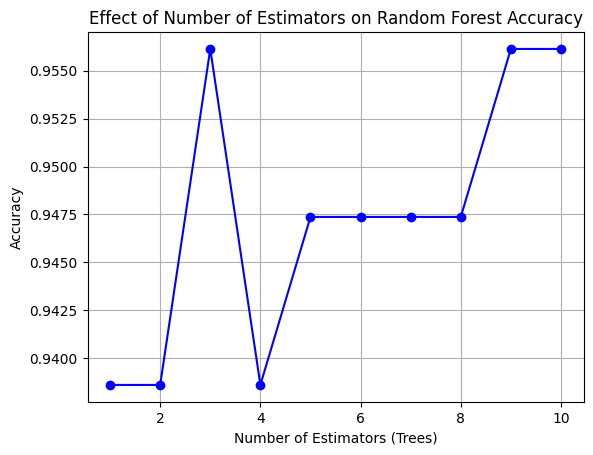

In [ ]:
# Step 10: Explore the effect of changing the number of estimators in Random Forest
estimators_range = [1,2,3,4,5,6,7,8,9,10]
accuracies_rf = []

for n_estimators in estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_rf = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracies_rf.append(accuracy)

# Plot the effect of number of estimators on Random Forest accuracy
plt.plot(estimators_range, accuracies_rf, marker='o', color='b')
plt.title("Effect of Number of Estimators on Random Forest Accuracy")
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Stack the predictions
predictions = np.array([y_pred_dt, y_pred_rf, y_pred_logreg])

# Max Voting: Choose the most frequent prediction (majority vote)
y_pred_max_voting = [np.bincount(predictions[:, i]).argmax() for i in range(predictions.shape[1])]
y_pred_max_voting = np.array(y_pred_max_voting)

# Evaluate the performance
accuracy_max_voting = accuracy_score(y_test, y_pred_max_voting)
print(f"Max Voting Accuracy: {accuracy_max_voting:.4f}")


Max Voting Accuracy: 0.9649


In [ ]:
# Get probabilities (using .predict_proba() for Random Forest and Logistic Regression)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Probability for class 1
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Average Voting: Average the probabilities
y_pred_prob_avg_voting = (y_pred_prob_rf + y_pred_prob_logreg + y_pred_prob_dt) / 3

# Predict based on average probabilities
y_pred_avg_voting = (y_pred_prob_avg_voting > 0.5).astype(int)

# Evaluate the performance
accuracy_avg_voting = accuracy_score(y_test, y_pred_avg_voting)
print(f"Average Voting Accuracy: {accuracy_avg_voting:.4f}")


Average Voting Accuracy: 0.9649


In [ ]:
# Calculate individual model accuracies (to be used as weights)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Calculate total accuracy
total_accuracy = accuracy_dt + accuracy_rf + accuracy_logreg

# Assign weights
weight_dt = accuracy_dt / total_accuracy
weight_rf = accuracy_rf / total_accuracy
weight_logreg = accuracy_logreg / total_accuracy

# Weighted Average Voting: Use weights to average probabilities
y_pred_prob_weighted_voting = (weight_rf * y_pred_prob_rf + weight_logreg * y_pred_prob_logreg + weight_dt * y_pred_prob_dt)

# Predict based on weighted average probabilities
y_pred_weighted_voting = (y_pred_prob_weighted_voting > 0.5).astype(int)

# Evaluate the performance
accuracy_weighted_voting = accuracy_score(y_test, y_pred_weighted_voting)
print(f"Weighted Average Voting Accuracy: {accuracy_weighted_voting:.4f}")


Weighted Average Voting Accuracy: 0.9649


In [ ]:
# Print results
print("\nComparison of ensemble techniques:")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print(f"Max Voting Accuracy: {accuracy_max_voting:.4f}")
print(f"Average Voting Accuracy: {accuracy_avg_voting:.4f}")
print(f"Weighted Average Voting Accuracy: {accuracy_weighted_voting:.4f}")



Comparison of ensemble techniques:
Decision Tree Accuracy: 0.9474
Random Forest Accuracy: 0.9649
Logistic Regression Accuracy: 0.9561
Max Voting Accuracy: 0.9649
Average Voting Accuracy: 0.9649
Weighted Average Voting Accuracy: 0.9649
